In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/user/Downloads/Data_rand.csv')

df = pd.DataFrame(data)

df.head()

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,2,0,0,1,1400,2900,500,10000,1000,5
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,1,0,0,0,200,1900,400,10000,3000,4
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,1,0,1,500,3600,500,4000,3000,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,1,0,0,1,600,3500,2300,7000,2000,5
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,0,1,1,1,200,2100,2400,4000,5000,4


In [26]:
#creating data and spitting numerica and categorical


data['Total Expenses'] = data['Monthly exp on transport'] + data['Monthly exp on food'] + \
                         data['Monthly exp on education'] + data['expenses on online takeout'] + \
                         data['expenditure on medicine'] + data['expenses on outings'] + \
                         data['Expenses on fresh groceries and whole foods.']


numeric_features = ['Age', 'Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food', 
                    'Monthly exp on education', 'Debt', 
                    'Expenses on fresh groceries and whole foods.', 'expenses on online takeout', 
                    'expenditure on medicine', 'expenses on outings', 'tax payments', 'Total Expenses']

categorical_features = ['Gender', 'Place of Stay', 'Relationship status', 'notable investments',
                        'Financial goals', 'Do you follow a monthly budget ?', 'how often do u dine out?',
                        'how often do you make impulse purchases?', 
                        'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
                        'how comfortable are you with taking financial risk in your investments', 
                        'Do you use any mobile apps or online platforms to manage your finances and investments']




In [27]:
# Preprocess the data


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



processed_data = preprocessor.fit_transform(data)


In [32]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import numpy as np

# cusotom created reccomended actions, acts as targets
data['Recommended Actions'] = np.random.choice(['Invest in stocks', 'Save more', 'Reduce expenses', 'Diversify investments'], size=len(data))

X = processed_data
y = data['Recommended Actions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

print(y_pred)


['Diversify investments' 'Save more' 'Diversify investments'
 'Invest in stocks' 'Reduce expenses' 'Reduce expenses' 'Invest in stocks'
 'Invest in stocks' 'Diversify investments' 'Diversify investments'
 'Diversify investments' 'Diversify investments' 'Diversify investments'
 'Diversify investments' 'Invest in stocks' 'Invest in stocks'
 'Invest in stocks' 'Diversify investments' 'Reduce expenses'
 'Invest in stocks' 'Reduce expenses' 'Invest in stocks'
 'Diversify investments' 'Save more' 'Invest in stocks'
 'Diversify investments' 'Invest in stocks' 'Reduce expenses'
 'Invest in stocks' 'Reduce expenses' 'Diversify investments'
 'Invest in stocks' 'Diversify investments' 'Save more' 'Invest in stocks'
 'Save more' 'Invest in stocks' 'Save more' 'Invest in stocks'
 'Invest in stocks' 'Invest in stocks' 'Diversify investments'
 'Reduce expenses' 'Diversify investments' 'Save more' 'Invest in stocks'
 'Diversify investments' 'Diversify investments' 'Invest in stocks'
 'Reduce expenses'

In [33]:
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
                       precision    recall  f1-score   support

Diversify investments       0.27      0.25      0.26        12
     Invest in stocks       0.40      0.35      0.38        17
      Reduce expenses       0.21      0.23      0.22        13
            Save more       0.10      0.12      0.11         8

             accuracy                           0.26        50
            macro avg       0.25      0.24      0.24        50
         weighted avg       0.27      0.26      0.27        50

Accuracy: 0.26
                       precision    recall  f1-score   support

Diversify investments       0.27      0.25      0.26        12
     Invest in stocks       0.40      0.35      0.38        17
      Reduce expenses       0.21      0.23      0.22        13
            Save more       0.10      0.12      0.11         8

             accuracy                           0.26        50
            macro avg

In [4]:
new_data_input = {
    'Age': [30],
    'Gender': [1],
    'Place of Stay': [0],
    'Relationship status': [0],
    'No of dependents': [2],
    'Monthly pocketmoney': [3000],
    'Monthly exp on transport': [200],
    'Monthly exp on food': [400],
    'Monthly exp on education': [300],
    'notable investments': [1500],
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100],
    'Debt': [2000],
    'Monthly savings': [500],
    'Financial goals': [10000],
    'Do you follow a monthly budget ?': [0],
    'how often do u dine out?': [1],
    'how often do you make impulse purchases?': [1],
    'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1],
    'how comfortable are you with taking financial risk in your investments': [1],
    'Do you use any mobile apps or online platforms to manage your finances and investments': [1],
    'Expenses on fresh groceries and whole foods.': [150],
    'expenses on online takeout': [50],
    'expenditure on medicine': [20],
    'expenses on outings': [100],
    'tax payments': [500],
    'what types of food do u spen money on': [4]
}

print(new_data_input)


{'Age': [30], 'Gender': [1], 'Place of Stay': [0], 'Relationship status': [0], 'No of dependents': [2], 'Monthly pocketmoney': [3000], 'Monthly exp on transport': [200], 'Monthly exp on food': [400], 'Monthly exp on education': [300], 'notable investments': [1500], 'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100], 'Debt': [2000], 'Monthly savings': [500], 'Financial goals': [10000], 'Do you follow a monthly budget ?': [0], 'how often do u dine out?': [1], 'how often do you make impulse purchases?': [1], 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1], 'how comfortable are you with taking financial risk in your investments': [1], 'Do you use any mobile apps or online platforms to manage your finances and investments': [1], 'Expenses on fresh groceries and whole foods.': [150], 'expenses on online takeout': [50], 'expenditure on medicine': [20], 'expenses on outings': [100], 'tax payments': [500], 'what types o

In [5]:
import pandas as pd
new_data = pd.DataFrame(new_data_input)
new_data

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,30,1,0,0,2,3000,200,400,300,1500,...,1,1,1,1,150,50,20,100,500,4


In [6]:
new_data['Total Expenses'] = new_data['Monthly exp on transport'] + new_data['Monthly exp on food'] + \
                         new_data['Monthly exp on education'] + new_data['expenses on online takeout'] + \
                         new_data['expenditure on medicine'] + new_data['expenses on outings'] + \
                         new_data['Expenses on fresh groceries and whole foods.']

numeric_features = ['Age', 'Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food',
                    'Monthly exp on education', 'Debt',
                    'Expenses on fresh groceries and whole foods.', 'expenses on online takeout',
                    'expenditure on medicine', 'expenses on outings', 'tax payments', 'Total Expenses']

categorical_features = ['Gender', 'Place of Stay', 'Relationship status', 'notable investments',
                        'Financial goals', 'Do you follow a monthly budget ?', 'how often do u dine out?',
                        'how often do you make impulse purchases?',
                        'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
                        'how comfortable are you with taking financial risk in your investments',
                        'Do you use any mobile apps or online platforms to manage your finances and investments']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



processed_data1 = preprocessor.fit_transform(new_data)

In [10]:
processed_data1.shape

(1, 23)

In [11]:
import joblib
model = joblib.load('RecommandSystem.pkl',mmap_mode='r')

result = model.predict(processed_data1)
print("Recommended : ",result)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DummyClassifier from version 1.2.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [1]:
import joblib

model = joblib.load('RS.pkl')

model

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, random_state=42)

In [2]:
model.feature_importances_

array([0.01787193, 0.01021889, 0.00194344, 0.00944114, 0.02430984,
       0.01939808, 0.05885795, 0.08746217, 0.06688493, 0.07369525,
       0.01828681, 0.        , 0.05539589, 0.10961818, 0.00739705,
       0.02114557, 0.01562088, 0.01445773, 0.00328952, 0.02006648,
       0.05609432, 0.14926732, 0.07329532, 0.03321231, 0.03606913,
       0.01669986])

In [4]:
import pandas as pd
data = pd.read_csv('RandData1.csv')
data

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,2,0,0,1,1400,2900,500,10000,1000,5
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,1,0,0,0,200,1900,400,10000,3000,4
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,1,0,1,500,3600,500,4000,3000,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,1,0,0,1,600,3500,2300,7000,2000,5
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,0,1,1,1,200,2100,2400,4000,5000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,21,1,0,1,4,4000,6300,2300,2300,800,...,1,1,1,1,1200,2600,2600,1000,3000,2
195,19,1,1,1,4,4000,4500,4700,1100,0,...,1,0,1,1,1000,600,1700,5000,0,3
196,21,1,0,1,5,8000,100,3200,100,2000,...,1,0,0,0,500,1100,300,0,4000,3
197,22,1,0,1,5,4000,7900,1100,900,1300,...,1,1,0,0,1500,1700,300,2000,2000,3


In [5]:
data.columns

Index(['Age', 'Gender', 'Place of Stay', 'Relationship status',
       'No of dependents', 'Monthly pocketmoney', 'Monthly exp on transport',
       'Monthly exp on food', 'Monthly exp on education',
       'notable investments',
       'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
       'Debt', 'Monthly savings', 'Financial goals',
       'Do you follow a monthly budget ?', 'how often do u dine out?',
       'how often do you make impulse purchases?',
       'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
       'how comfortable are you with taking financial risk in your investments',
       'Do you use any mobile apps or online platforms to manage your finances and investments',
       'Expenses on fresh groceries and whole foods.',
       'expenses on online takeout', 'expenditure on medicine',
       'expenses on outings', 'tax payments',
       'what types of food do u spen money on'],
      dtype='object')

In [17]:
data['Monthly savings']

0       300
1       600
2      1500
3      1900
4      1900
       ... 
194    1200
195    1800
196    1300
197    2000
198    1200
Name: Monthly savings, Length: 199, dtype: int64

In [39]:
import pandas as pd

# Load the dataset
df = pd.read_csv('RandData1.csv')

# Define the recommendation function
def recommend(row):
    if row['how comfortable are you with taking financial risk in your investments'] == 1:
        return 1  # Invest in stocks
    elif row['Monthly savings'] < 1000:
        return 2  # Save more
    elif row['Monthly pocketmoney'] - (row['Monthly exp on transport'] + row['Monthly exp on food'] + row['Monthly exp on education']) < 50:
        return 3  # Reduce expenses
    else:
        return 4  # Diversify investments

# Apply the function to create the new target column
df['Recommendation'] = df.apply(recommend, axis=1)

# Save the updated dataset


In [40]:
df

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on,Recommendation
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,0,0,1,1400,2900,500,10000,1000,5,2
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,0,0,0,200,1900,400,10000,3000,4,2
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,0,1,500,3600,500,4000,3000,4,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,0,0,1,600,3500,2300,7000,2000,5,4
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,1,1,1,200,2100,2400,4000,5000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,21,1,0,1,4,4000,6300,2300,2300,800,...,1,1,1,1200,2600,2600,1000,3000,2,1
195,19,1,1,1,4,4000,4500,4700,1100,0,...,0,1,1,1000,600,1700,5000,0,3,1
196,21,1,0,1,5,8000,100,3200,100,2000,...,0,0,0,500,1100,300,0,4000,3,4
197,22,1,0,1,5,4000,7900,1100,900,1300,...,1,0,0,1500,1700,300,2000,2000,3,3


In [41]:
features = df.drop(columns=['Recommendation'])
target = df['Recommendation']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00         3
           3       0.75      0.86      0.80         7
           4       0.80      0.67      0.73         6

    accuracy                           0.93        40
   macro avg       0.89      0.88      0.88        40
weighted avg       0.93      0.93      0.92        40



In [51]:
y_pred

array([1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 4, 1, 1, 4, 1, 3,
       1, 1, 2, 1, 4, 3, 3, 1, 3, 1, 1, 1, 4, 4, 2, 1, 1, 1], dtype=int64)

In [53]:
recommend_results = list(y_pred)
recommend_results

[1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 4,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 4,
 4,
 2,
 1,
 1,
 1]

[1 2 3 4]


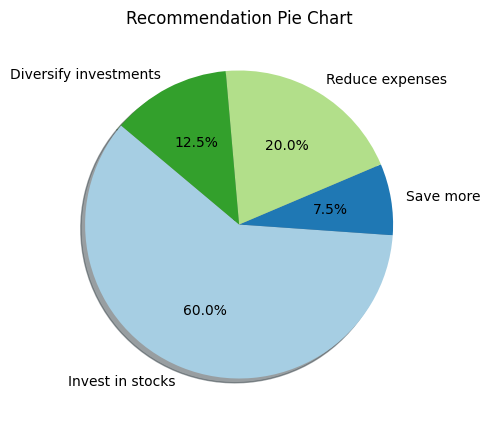

In [61]:
import matplotlib.pyplot as plt
import numpy as np
unique, counts = np.unique(recommend_results, return_counts=True)
sizes = counts

print(unique)
recommendation_mapping = {
    1: "Invest in stocks",
    2: "Save more",
    3: "Reduce expenses",
    4: "Diversify investments"
}

# Labels
labels = [recommendation_mapping[i] for i in unique]

# Colors
colors = plt.cm.Paired(range(len(unique)))

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Recommendation Pie Chart')

# Display the pie chart
plt.show()

In [69]:
recommend_results = np.array([1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 4, 1, 1, 4, 1, 3, 1, 1, 2, 1, 4, 3, 3, 1, 3, 1, 1, 1, 4, 4, 2, 1, 1, 1], dtype=int)

# Count occurrences of each value
unique, counts = np.unique(recommend_results, return_counts=True)
sizes = counts

In [74]:
new_data_input = {
    'Age': [30],
    'Gender': [1],
    'Place of Stay': [0],
    'Relationship status': [0],
    'No of dependents': [2],
    'Monthly pocketmoney': [3000],
    'Monthly exp on transport': [200],
    'Monthly exp on food': [400],
    'Monthly exp on education': [300],
    'notable investments': [1500],
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100],
    'Debt': [2000],
    'Monthly savings': [500],
    'Financial goals': [10000],
    'Do you follow a monthly budget ?': [0],
    'how often do u dine out?': [1],
    'how often do you make impulse purchases?': [1],
    'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1],
    'how comfortable are you with taking financial risk in your investments': [1],
    'Do you use any mobile apps or online platforms to manage your finances and investments': [1],
    'Expenses on fresh groceries and whole foods.': [150],
    'expenses on online takeout': [50],
    'expenditure on medicine': [20],
    'expenses on outings': [100],
    'tax payments': [500],
    'what types of food do u spen money on': [4]
}


# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data_input)

# Make prediction
new_prediction = model.predict(new_data_df)
print("Recommendation for new data:", new_prediction)

print(type(new_prediction))


Recommendation for new data: [1]
<class 'numpy.ndarray'>


In [71]:
recommendation_mapping = {
    1: "Invest in stocks",
    2: "Save more",
    3: "Reduce expenses",
    4: "Diversify investments"
}

In [72]:
new_recommendation = [recommendation_mapping[pred] for pred in new_prediction]
print("Recommendation for new data:", new_recommendation)

Recommendation for new data: ['Invest in stocks']


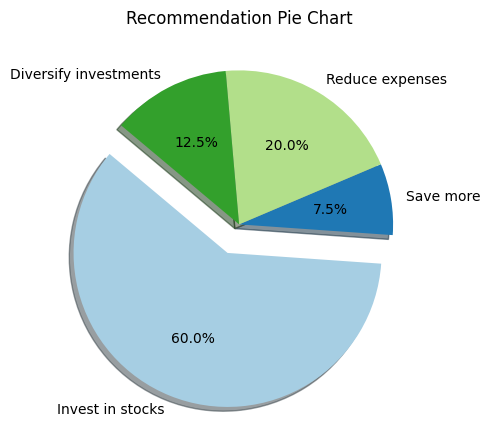

In [73]:
# Highlight the user's prediction in the pie chart


explode = [0.2 if recommendation_mapping[unique[i]] in new_recommendation else 0 for i in range(len(unique))]

# Colors
colors = plt.cm.Paired(range(len(unique)))

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)
plt.title('Recommendation Pie Chart')

# Display the pie chart
plt.show()

In [49]:
import joblib

joblib.dump(model,'Reccommend.pkl')

['Reccommend.pkl']

In [50]:
model = joblib.load('Reccommend.pkl')
model

DecisionTreeClassifier(random_state=42)

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot